In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [5]:
# Step 1: Data Preprocessing
features = ['Average Cost for two', 'Price range', 'Votes', 'Has Table booking', 
            'Has Online delivery', 'Latitude', 'Longitude', 'Cuisine Count']
target = 'Aggregate rating'

df['Cuisine Count'] = df['Cuisines'].str.split(', ').fillna('Unknown').apply(lambda x: len(x) if isinstance(x, list) else 1)
df_model = df[features + [target]].copy()

df_model['Average Cost for two'] = df_model['Average Cost for two'].fillna(df_model['Average Cost for two'].median())
df_model['Votes'] = df_model['Votes'].fillna(df_model['Votes'].median())
df_model['Latitude'] = df_model['Latitude'].fillna(df_model['Latitude'].mean())
df_model['Longitude'] = df_model['Longitude'].fillna(df_model['Longitude'].mean())
df_model['Price range'] = df_model['Price range'].fillna(df_model['Price range'].mode()[0])
df_model['Has Table booking'] = df_model['Has Table booking'].fillna('No')
df_model['Has Online delivery'] = df_model['Has Online delivery'].fillna('No')

label_encoder = LabelEncoder()
df_model['Has Table booking'] = label_encoder.fit_transform(df_model['Has Table booking'])
df_model['Has Online delivery'] = label_encoder.fit_transform(df_model['Has Online delivery'])

df_model = df_model.dropna(subset=[target])
print("\nMissing Values After Preprocessing:")
print(df_model.isnull().sum())


Missing Values After Preprocessing:
Average Cost for two    0
Price range             0
Votes                   0
Has Table booking       0
Has Online delivery     0
Latitude                0
Longitude               0
Cuisine Count           0
Aggregate rating        0
dtype: int64


In [7]:
# Step 2: Split the Dataset
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (7640, 8)
Testing set size: (1911, 8)


In [9]:
# Step 3: Build and Evaluate Models
results = {}
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    return y_pred

lr_model = LinearRegression()
lr_pred = evaluate_model(lr_model, "Linear Regression")

dt_model = DecisionTreeRegressor(random_state=42)
dt_pred = evaluate_model(dt_model, "Decision Tree")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pred = evaluate_model(rf_model, "Random Forest")


Linear Regression Performance:
MSE: 1.6450
RMSE: 1.2826
R2: 0.2773

Decision Tree Performance:
MSE: 0.1909
RMSE: 0.4370
R2: 0.9161

Random Forest Performance:
MSE: 0.0947
RMSE: 0.3077
R2: 0.9584



Model Performance Comparison:
                        MSE      RMSE        R2
Linear Regression  1.644970  1.282564  0.277288
Decision Tree      0.190938  0.436965  0.916112
Random Forest      0.094702  0.307737  0.958393


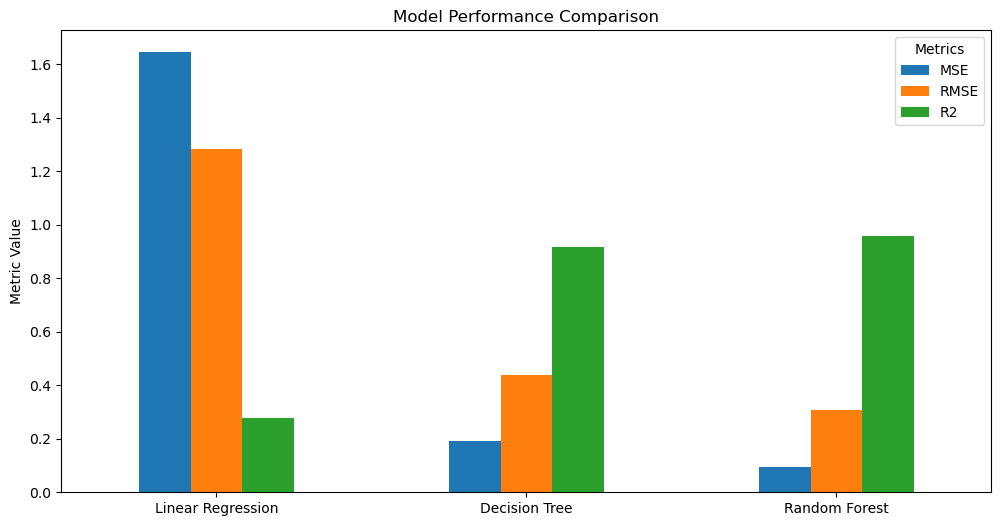

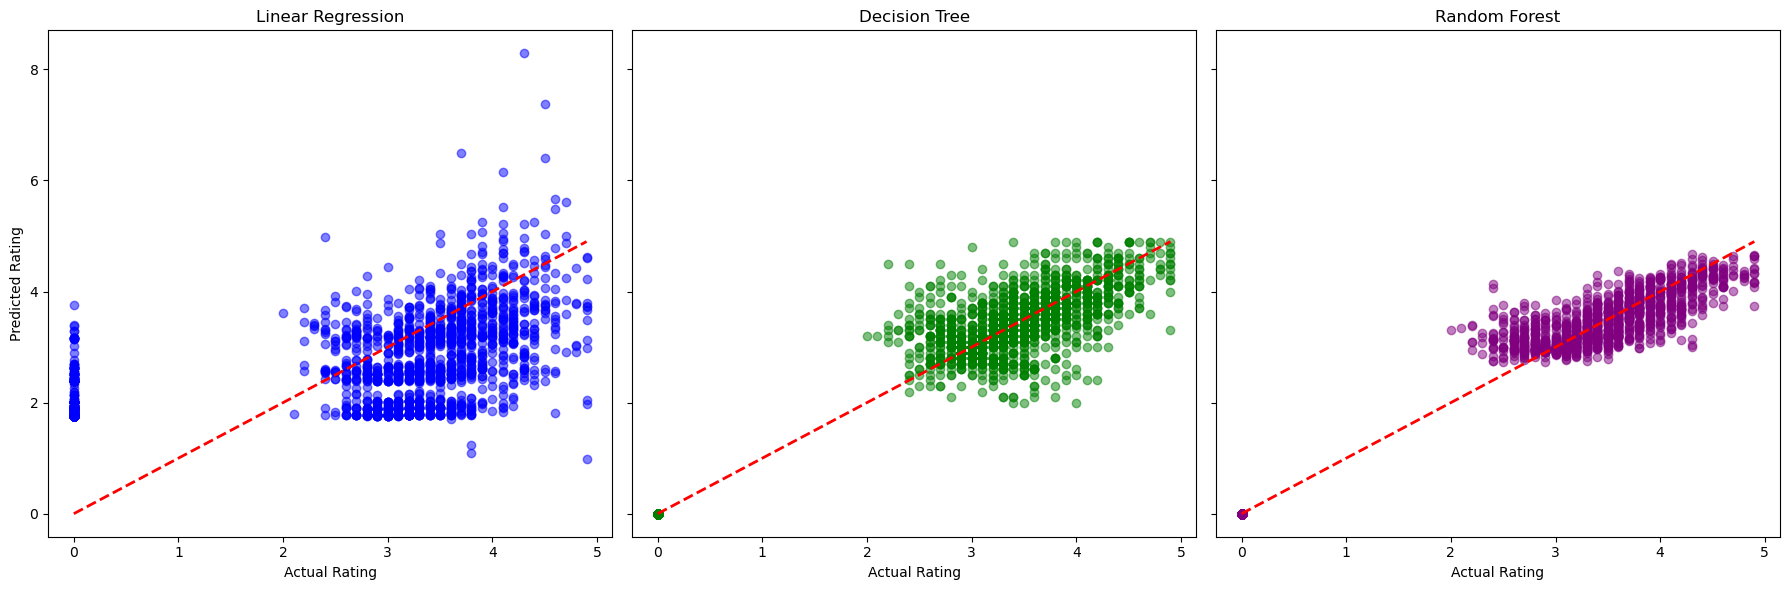

In [11]:
# Step 4: Compare Model Performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
axes[0].scatter(y_test, lr_pred, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual Rating')
axes[0].set_ylabel('Predicted Rating')
axes[1].scatter(y_test, dt_pred, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Actual Rating')
axes[2].scatter(y_test, rf_pred, alpha=0.5, color='purple')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Actual Rating')
plt.tight_layout()
plt.show()


Feature Importance (Random Forest):
                Feature  Importance
2                 Votes    0.949200
6             Longitude    0.021506
5              Latitude    0.015666
0  Average Cost for two    0.007550
7         Cuisine Count    0.003048
4   Has Online delivery    0.001344
1           Price range    0.001074
3     Has Table booking    0.000611


C:\Users\amiro\AppData\Local\Temp\ipykernel_15808\1354141523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


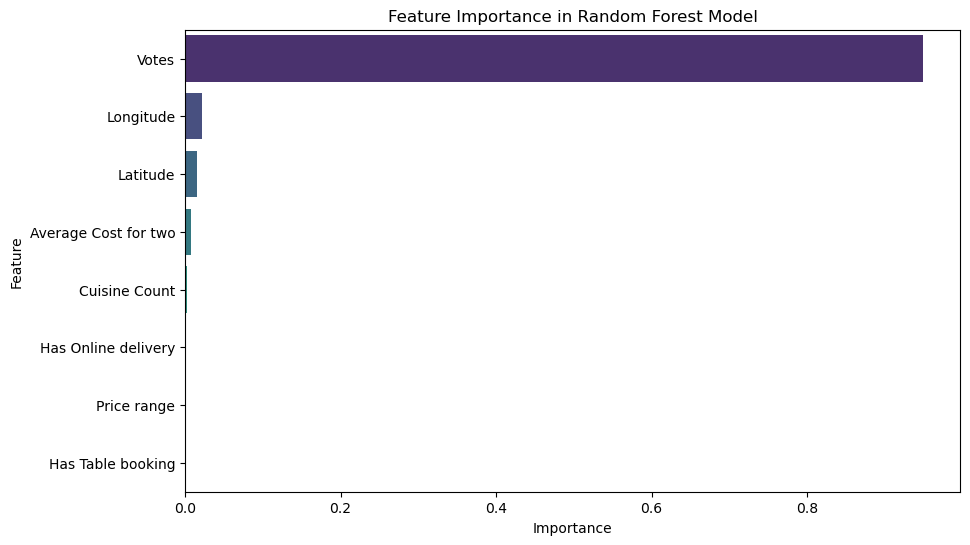

In [13]:
# Step 5: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()